In [1]:
import os
import sys 

PROJECT_ROOT = os.path.abspath('..')
sys.path.append(PROJECT_ROOT)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Heart Predication

In [3]:
heart = pd.read_csv('../datasets/heart/train-2.csv')

### Quick Look of Datasets

In [4]:
heart.shape

(1025, 14)

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Visualize the dataset

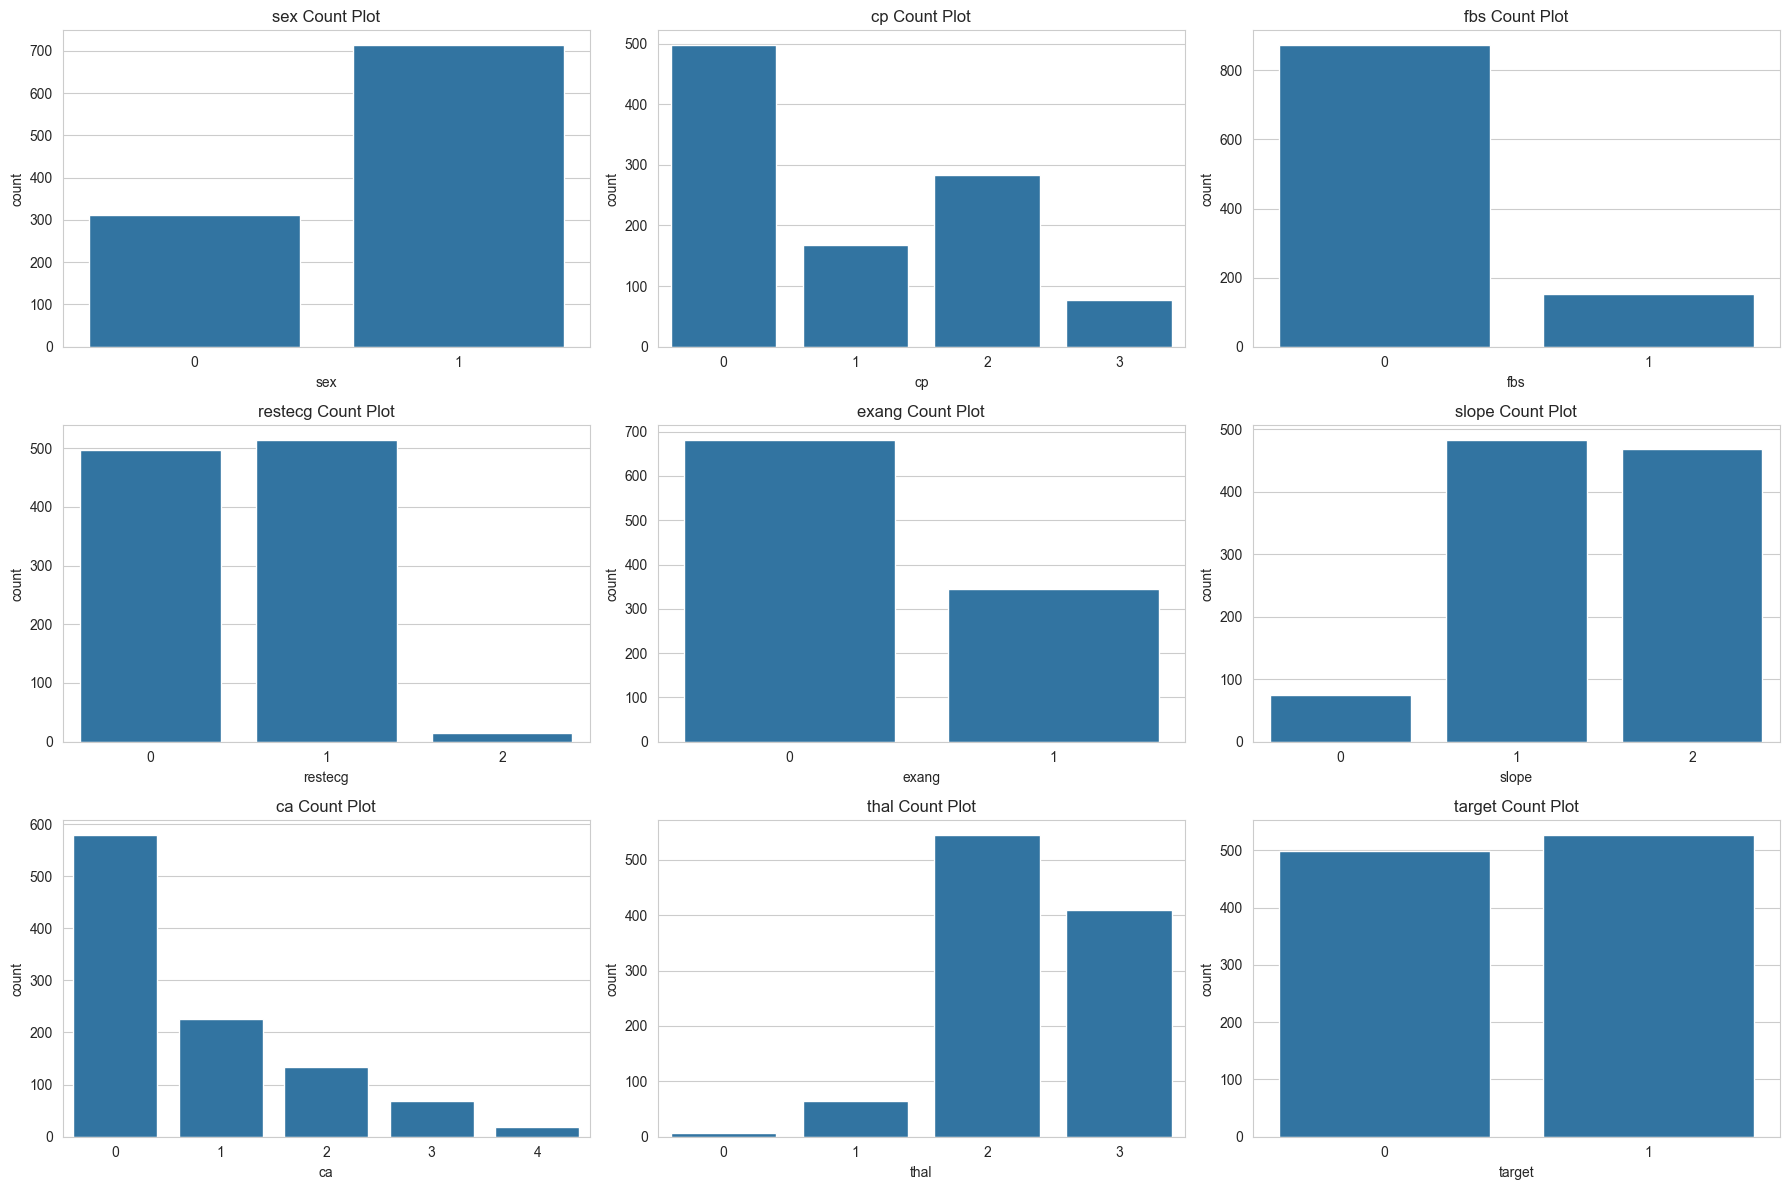

In [10]:
from src.visualization.plots import count_plot_multiple_features
count_plot_multiple_features(heart, cols=categorical_columns, n_cols=3)

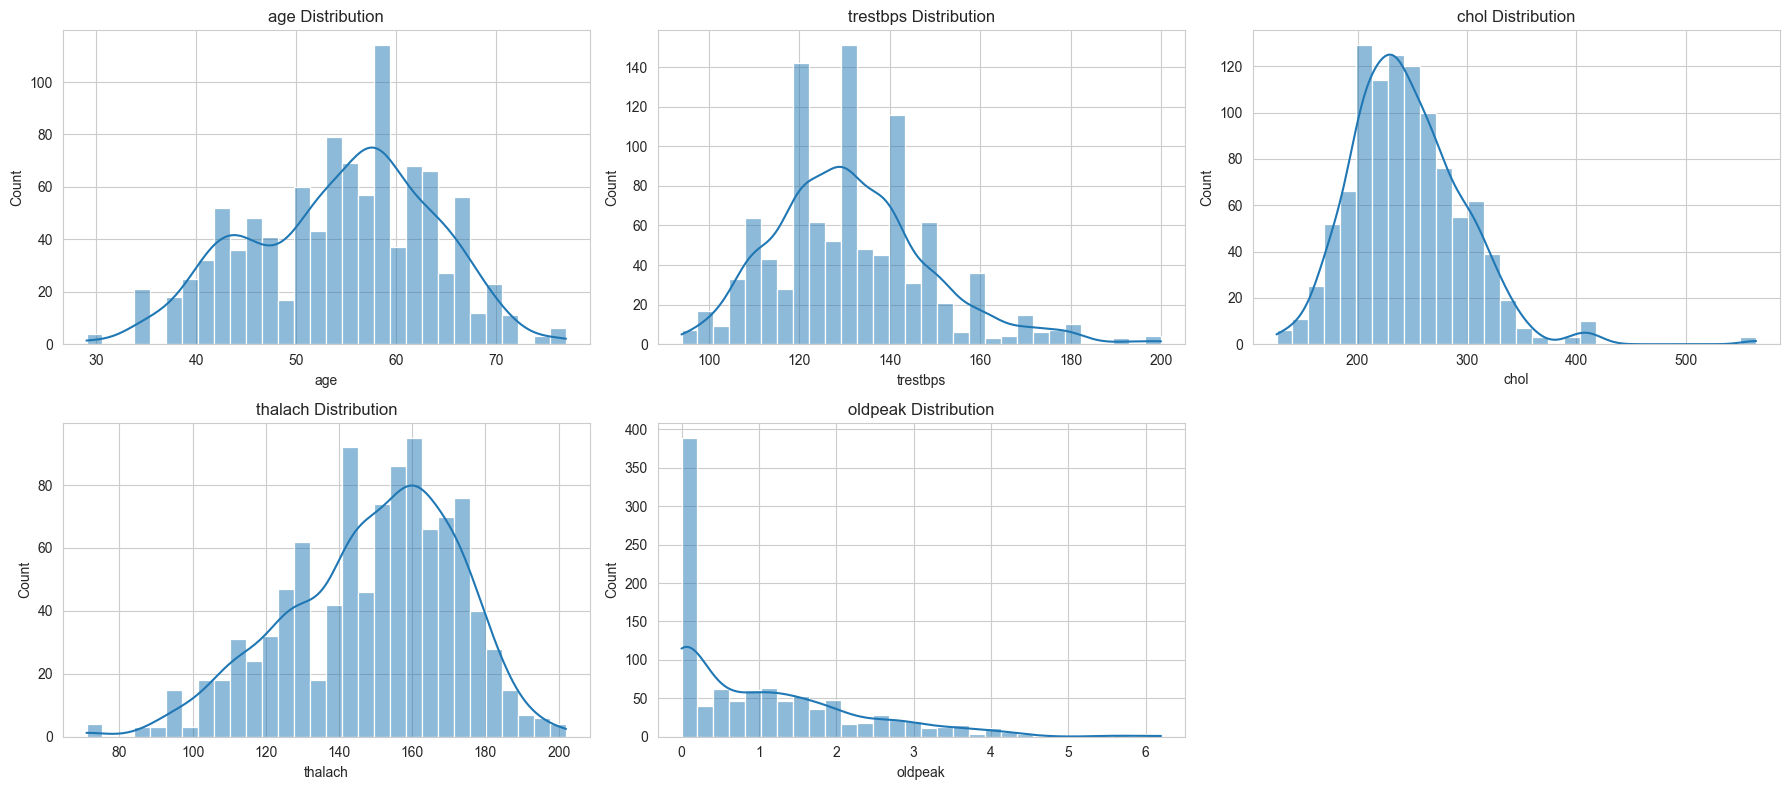

In [11]:
from src.visualization.plots import plot_multiple_features
plot_multiple_features(heart, cols=numerical_columns, n_cols=3)

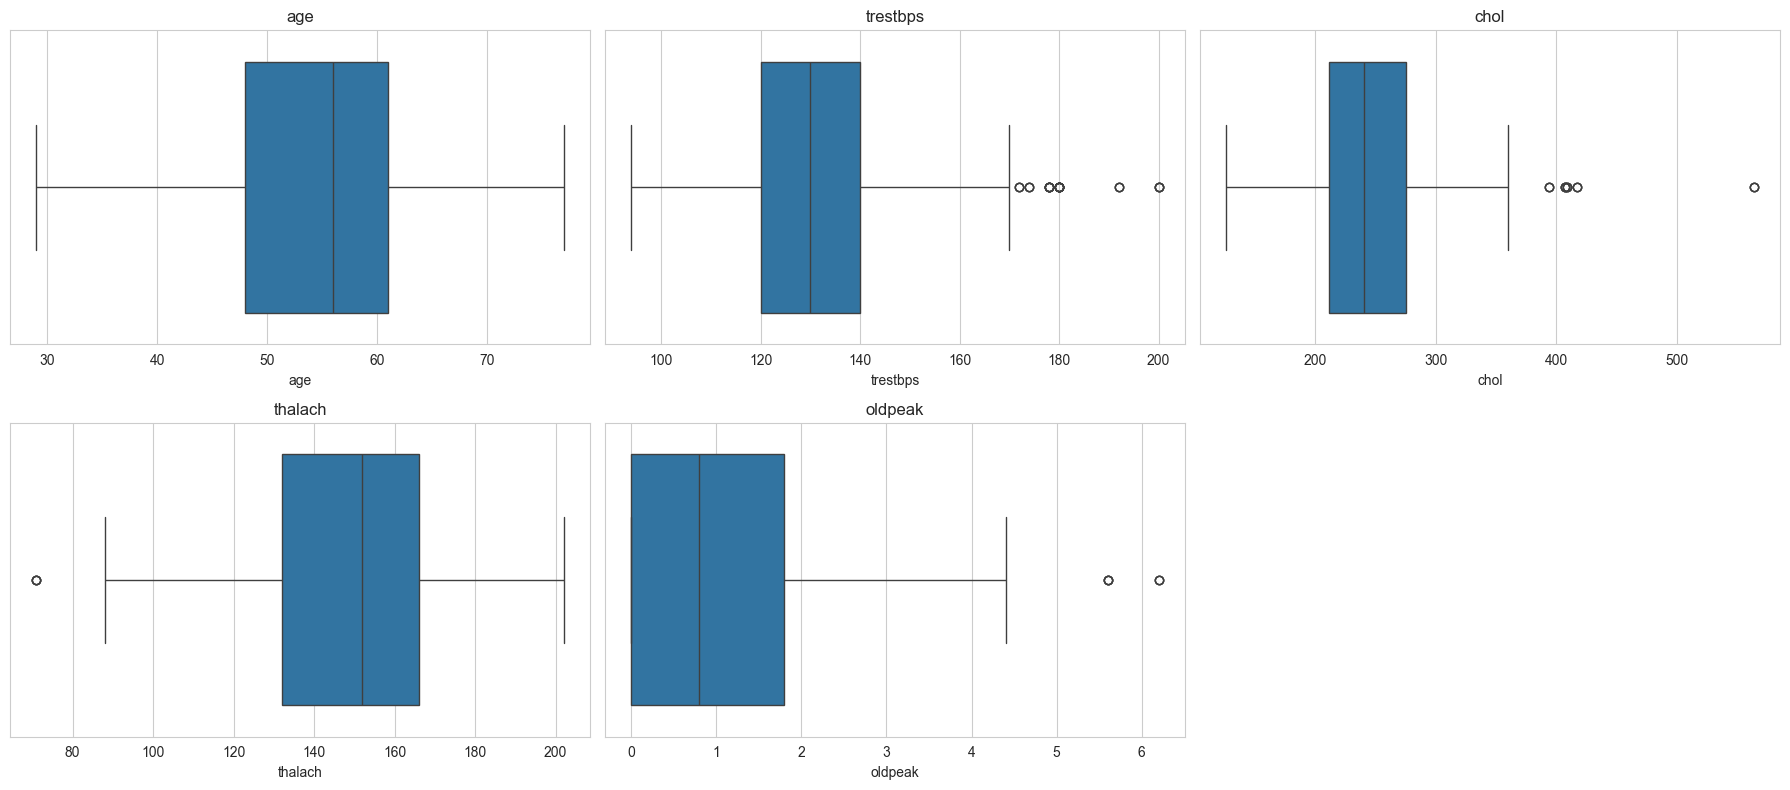

In [12]:
from src.visualization.plots import plot_multiple_boxplot
plot_multiple_boxplot(heart, numerical_columns, 3)


### Cleaning the dataset

In [13]:
heart_copy = heart.copy()

In [14]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    """
    Detect outliers using IQR method
    """
    outlier_indices = []
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())
        
        print(f"\n{col}:")
        print(f"  Lower bound: {lower_bound:.2f}")
        print(f"  Upper bound: {upper_bound:.2f}")
        print(f"  Number of outliers: {len(outliers)}")
    
    return list(set(outlier_indices))

outlier_indices = detect_outliers_iqr(heart_copy, numerical_columns)
print(f"\nTotal rows with outliers: {len(outlier_indices)}")

# Remove outliers
heart_copy.drop(outlier_indices, inplace=True)



age:
  Lower bound: 28.50
  Upper bound: 80.50
  Number of outliers: 0

trestbps:
  Lower bound: 90.00
  Upper bound: 170.00
  Number of outliers: 30

chol:
  Lower bound: 115.00
  Upper bound: 371.00
  Number of outliers: 16

thalach:
  Lower bound: 81.00
  Upper bound: 217.00
  Number of outliers: 4

oldpeak:
  Lower bound: -2.70
  Upper bound: 4.50
  Number of outliers: 7

Total rows with outliers: 57


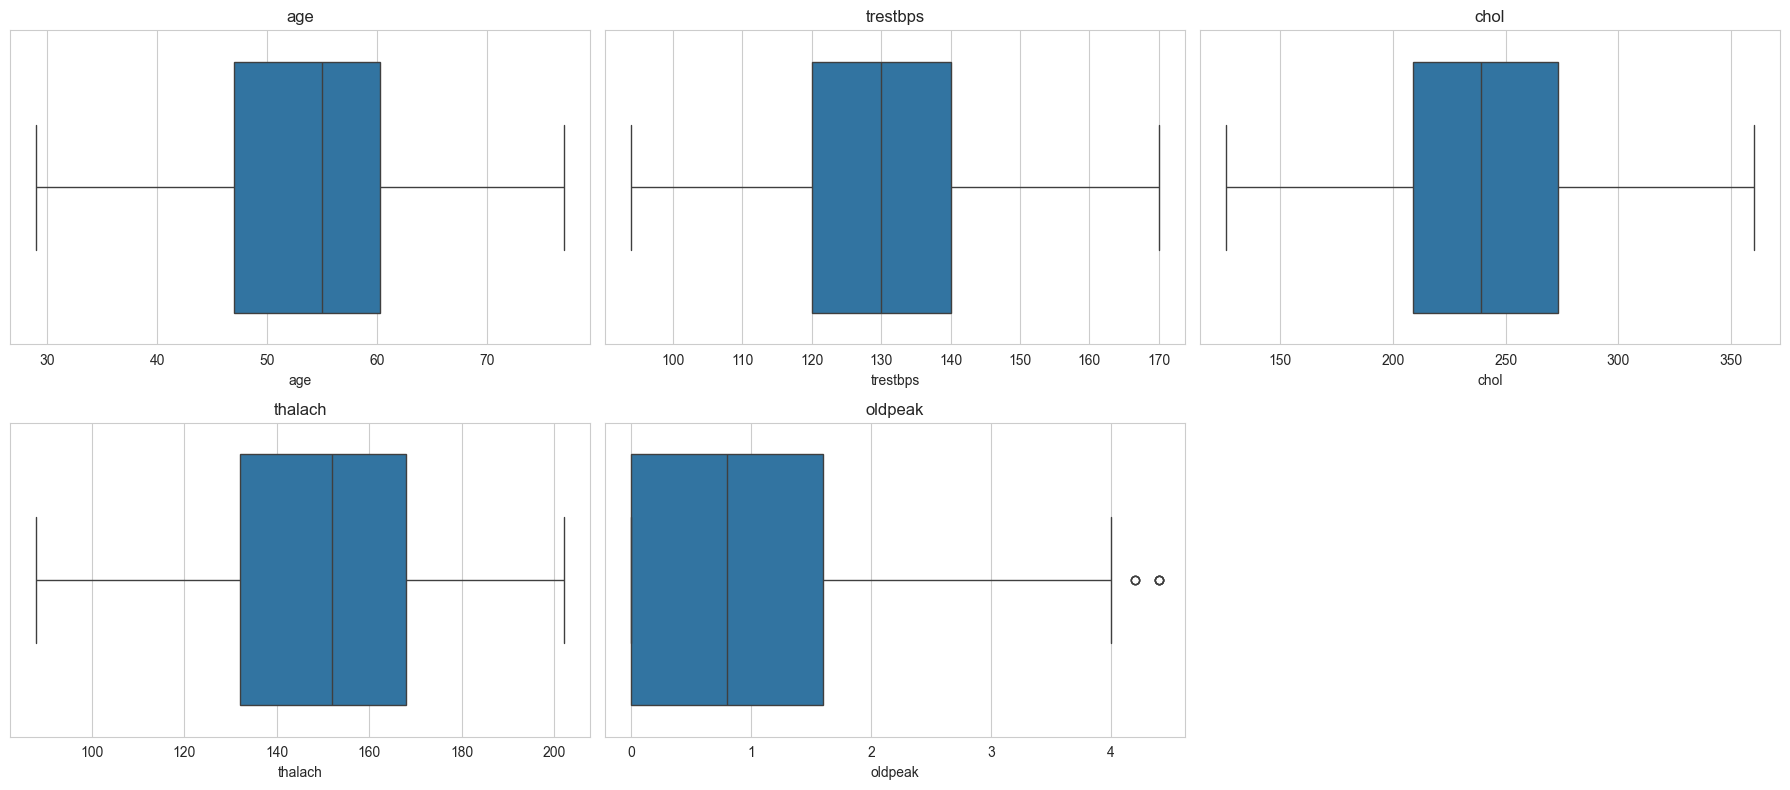

In [15]:
from src.visualization.plots import plot_multiple_boxplot
plot_multiple_boxplot(heart_copy, numerical_columns, 3)


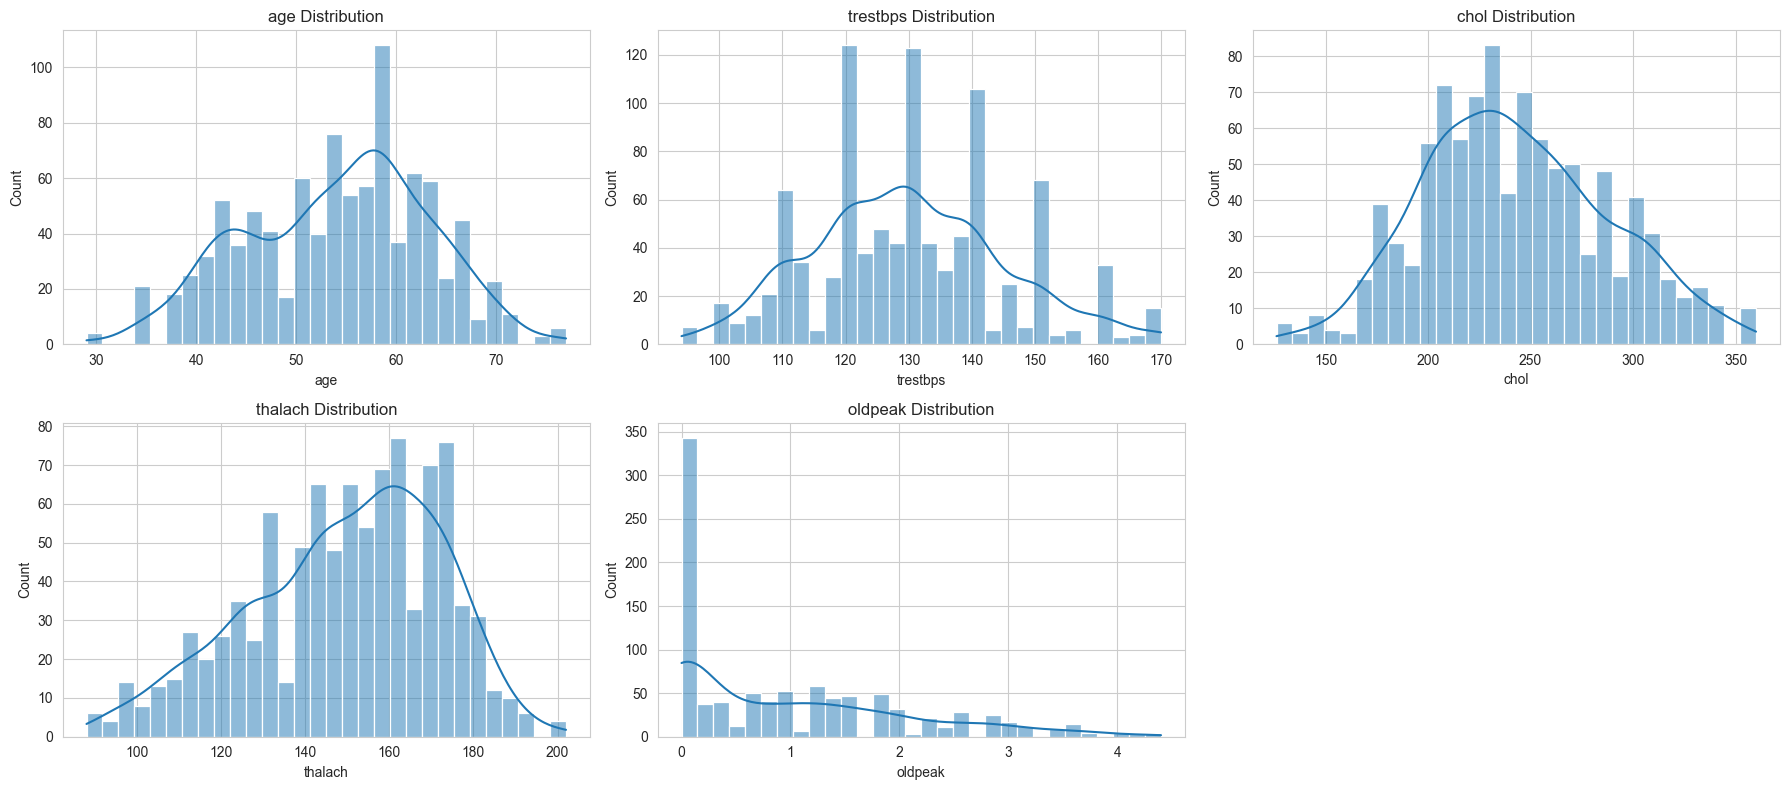

In [16]:
from src.visualization.plots import plot_multiple_features
plot_multiple_features(heart_copy, cols=numerical_columns, n_cols=3)

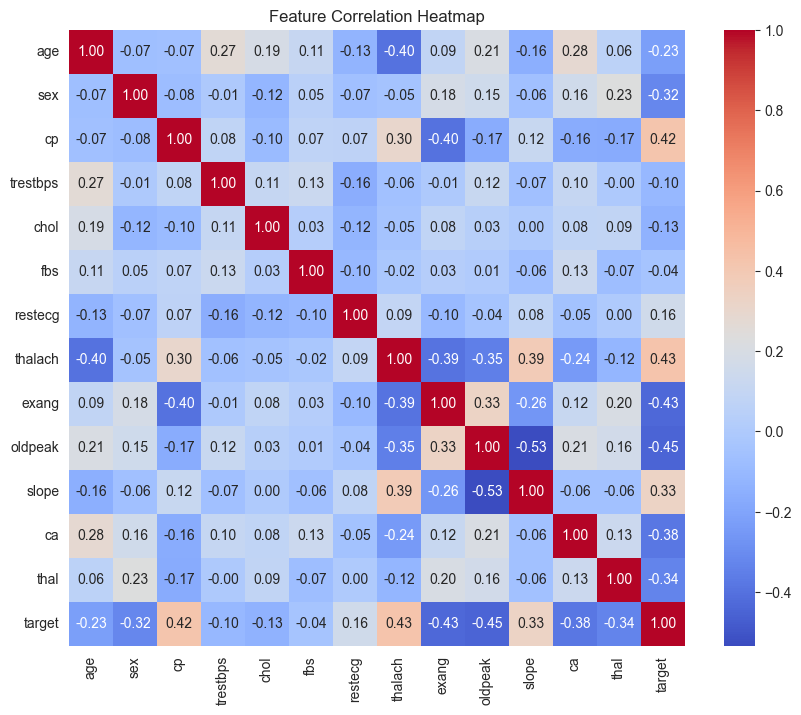

In [17]:
from src.visualization.plots import plot_correlation_heatmap
plot_correlation_heatmap(heart_copy)

In [18]:
from src.utils.main import corelation_data
corelation_data(heart_copy, 'target')


target      1.000000
thalach     0.427200
cp          0.422152
slope       0.333978
restecg     0.155776
fbs        -0.037932
trestbps   -0.104933
chol       -0.133325
age        -0.228869
sex        -0.319633
thal       -0.335024
ca         -0.379418
exang      -0.433572
oldpeak    -0.449996
Name: target, dtype: float64

In [20]:
# Separate
X = heart_copy.drop(['target'], axis=1)
y = heart_copy['target']
X.shape, y.shape

((968, 13), (968,))

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((677, 13), (677,), (291, 13), (291,))

In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svc_pipeline = make_pipeline(StandardScaler(), SVC(random_state=42))

In [23]:
svc_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('svc', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'


In [24]:
# Step 10: Make predictions
y_pred = svc_pipeline.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Martix:', confusion_matrix(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.85      0.96      0.90       138
           1       0.96      0.85      0.90       153

    accuracy                           0.90       291
   macro avg       0.90      0.90      0.90       291
weighted avg       0.91      0.90      0.90       291

Confusion Martix: [[132   6]
 [ 23 130]]
Accuracy Score: 0.9003436426116839


### Real world predications

In [26]:
# Patient 1: Healthy young person
patient_1 = {
    'age': 35,
    'sex': 1,           # Male
    'cp': 3,            # Asymptomatic
    'trestbps': 120,    # Normal blood pressure
    'chol': 180,        # Normal cholesterol
    'fbs': 0,           # Normal blood sugar
    'restecg': 0,       # Normal ECG
    'thalach': 170,     # Good max heart rate
    'exang': 0,         # No exercise angina
    'oldpeak': 0.0,     # No ST depression
    'slope': 1,         # Flat slope
    'ca': 0,            # No vessels colored
    'thal': 3           # Normal
}

# Patient 2: High risk individual
patient_2 = {
    'age': 65,
    'sex': 0,           # Female
    'cp': 0,            # Typical angina
    'trestbps': 160,    # High blood pressure
    'chol': 280,        # High cholesterol
    'fbs': 1,           # High blood sugar
    'restecg': 2,       # Abnormal ECG
    'thalach': 120,     # Low max heart rate
    'exang': 1,         # Exercise induced angina
    'oldpeak': 2.5,     # Significant ST depression
    'slope': 2,         # Downsloping
    'ca': 2,            # 2 vessels colored
    'thal': 7           # Reversible defect
}

# Patient 3: Moderate risk
patient_3 = {
    'age': 52,
    'sex': 1,           # Male
    'cp': 2,            # Non-anginal pain
    'trestbps': 140,    # Slightly elevated BP
    'chol': 220,        # Slightly high cholesterol
    'fbs': 0,           # Normal blood sugar
    'restecg': 1,       # ST-T abnormality
    'thalach': 145,     # Moderate heart rate
    'exang': 0,         # No exercise angina
    'oldpeak': 1.2,     # Mild ST depression
    'slope': 1,         # Flat
    'ca': 1,            # 1 vessel colored
    'thal': 6           # Fixed defect
}

# Patient 4: Very healthy athlete
patient_4 = {
    'age': 28,
    'sex': 1,           # Male
    'cp': 3,            # Asymptomatic
    'trestbps': 110,    # Low BP (athlete)
    'chol': 160,        # Low cholesterol
    'fbs': 0,           # Normal blood sugar
    'restecg': 0,       # Normal ECG
    'thalach': 190,     # Very high max heart rate
    'exang': 0,         # No exercise angina
    'oldpeak': 0.0,     # No ST depression
    'slope': 0,         # Upsloping
    'ca': 0,            # No vessels colored
    'thal': 3           # Normal
}

# Patient 5: Elderly with some risk factors
patient_5 = {
    'age': 70,
    'sex': 0,           # Female
    'cp': 1,            # Atypical angina
    'trestbps': 150,    # Elevated BP
    'chol': 240,        # High cholesterol
    'fbs': 1,           # High blood sugar (diabetic)
    'restecg': 1,       # ST-T abnormality
    'thalach': 130,     # Low max heart rate
    'exang': 1,         # Exercise angina
    'oldpeak': 1.8,     # Moderate ST depression
    'slope': 2,         # Downsloping
    'ca': 1,            # 1 vessel colored
    'thal': 7           # Reversible defect
}

# Combine all patients into a dataframe
new_patients = pd.DataFrame([patient_1, patient_2, patient_3, patient_4, patient_5])
new_patients

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,35,1,3,120,180,0,0,170,0,0.0,1,0,3
1,65,0,0,160,280,1,2,120,1,2.5,2,2,7
2,52,1,2,140,220,0,1,145,0,1.2,1,1,6
3,28,1,3,110,160,0,0,190,0,0.0,0,0,3
4,70,0,1,150,240,1,1,130,1,1.8,2,1,7


In [27]:
svc_pipeline.predict(new_patients)

array([1, 1, 0, 1, 1])

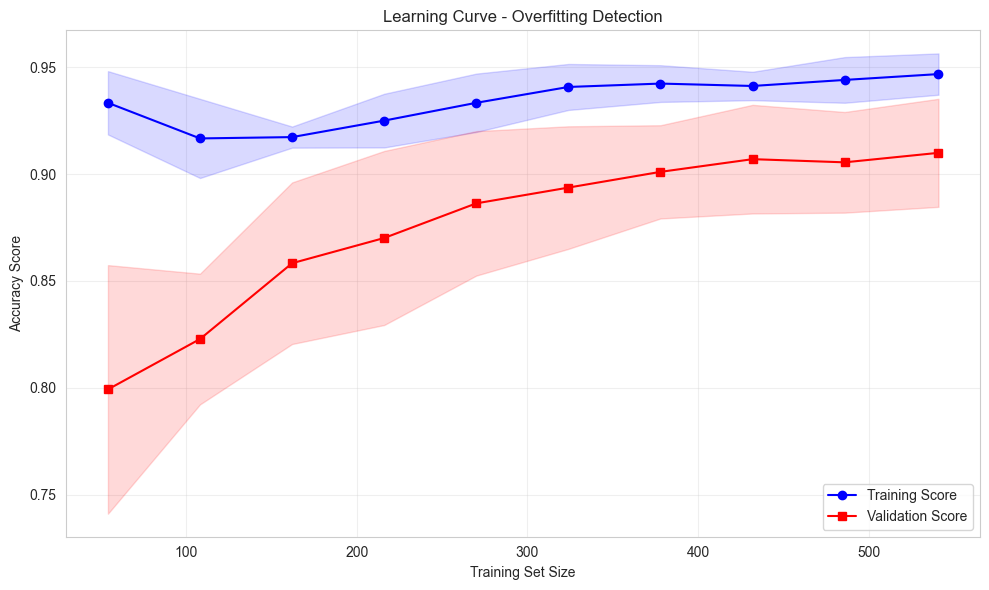


LEARNING CURVE INTERPRETATION:
✅ GOOD FIT - Training and validation curves are close
   The model generalizes well.


In [28]:
from sklearn.model_selection import cross_val_score, learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    svc_pipeline, 
    X_train, 
    y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, val_mean, label='Validation Score', color='red', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve - Overfitting Detection')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("LEARNING CURVE INTERPRETATION:")
print("="*80)

final_gap = train_mean[-1] - val_mean[-1]

if final_gap > 0.10:
    print("⚠️ OVERFITTING - Large gap between training and validation curves")
    print("   The model performs much better on training data.")
elif final_gap > 0.05:
    print("⚠️ SLIGHT OVERFITTING - Moderate gap between curves")
elif val_mean[-1] < 0.70:
    print("⚠️ UNDERFITTING - Both curves are low")
    print("   The model is too simple for the data.")
else:
    print("✅ GOOD FIT - Training and validation curves are close")
    print("   The model generalizes well.")

## Export Model as Pickle

In [29]:
import joblib

joblib.dump(svc_pipeline, '../pickle-models/heart/heart.pkl')

['../pickle-models/heart/heart.pkl']